In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

# Newton Forward Interpolation

In [109]:
def newton_forward_table(size,y_column_no,y):
    diff_y=np.empty(size)
    i=0
    while(i<size-y_column_no):
        diff_y[i]=y[i+1]-y[i]
        i=i+1
    while(i<size):
        diff_y[i]=np.nan
        i=i+1
    return diff_y


In [110]:
X=[1.00,1.25,1.50,1.75,2.00]
Y=[0.3679,0.2865,0.2231,0.1738,0.1353]
find_x=1.9
size=len(X)
height=X[1]-X[0]
x0=X[0]

df = pd.DataFrame({'X':X, 'Y': Y})
i=1
column_name="Y"
while(i<size):
    previous_column_name=column_name
    column_name = f'Delta^{i}_Y'  # Create column names dynamically
    df[column_name] = newton_forward_table(size,i,df[previous_column_name])
    i=i+1
# Display the DataFrame
print(df)

      X       Y  Delta^1_Y  Delta^2_Y  Delta^3_Y  Delta^4_Y
0  1.00  0.3679    -0.0814     0.0180    -0.0039     0.0006
1  1.25  0.2865    -0.0634     0.0141    -0.0033        NaN
2  1.50  0.2231    -0.0493     0.0108        NaN        NaN
3  1.75  0.1738    -0.0385        NaN        NaN        NaN
4  2.00  0.1353        NaN        NaN        NaN        NaN


In [111]:
import matplotlib.pyplot as plt

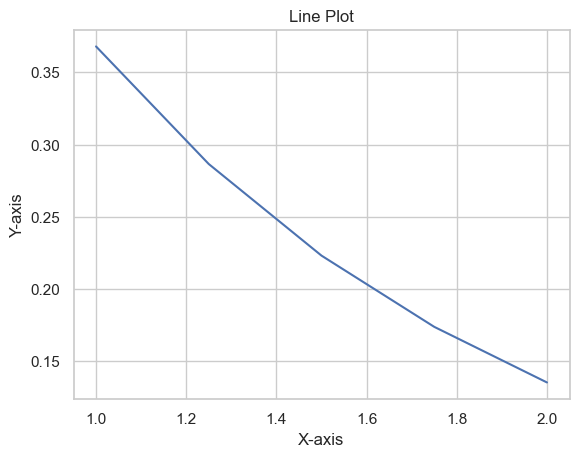

In [112]:

sns.set(style="whitegrid")  # Optional: Set the plot style
sns.lineplot(x=df['X'], y=df['Y'])

# Add labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot")

# Show the plot
plt.show()

In [113]:
def calculation_p_series(p,upto):
    #for cacluale p , p(p-1)(p-2) , p(p-1)(p-2)(p-3)
    i=1
    value=p
    while(i<upto):
        value=value*(p-i)
        i=i+1
    return value/math.factorial(upto)

def newton_forward(df2,p,size):
    # formulae:
    #yp=y0+p(Delta_y)+p(p-1)(delta^2_y)/2fact + p(p-1)(p-2)(delta^3_y)/3fact+.......
    yp=0
    yp=df2['Y'][0]
    i=1
    while(i<size):
        yp=yp+(calculation_p_series(p,i)*df2[f'Delta^{i}_Y'][0])
        i=i+1
    return yp

In [114]:
#what value of X you want to find Y?
#find_y=?
#calculate p?
p=((find_x-x0))/height
print(f"Height: {height }")
print(f"Intial value of X : {x0}")
print(f"Calculated Value of P : {p}")
find_y=newton_forward(df,p,size)
print(find_y)

Height: 0.25
Intial value of X : 1.0
Calculated Value of P : 3.5999999999999996
0.14959024000000004


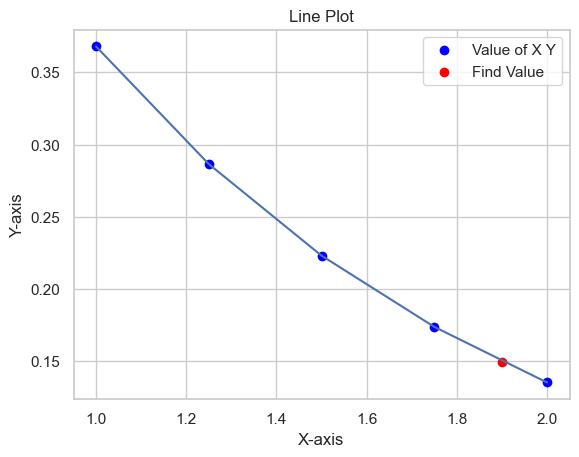

In [115]:
# Show the data point (x1, y1) as a red dot
sns.set(style="whitegrid")  # Optional: Set the plot style
sns.lineplot(x=df['X'], y=df['Y'])

# Add labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot")
plt.scatter(df['X'], df['Y'], color='blue',label='Value of X Y')
plt.scatter(find_x, find_y, color='red', label='Find Value')

# Add a legend
plt.legend()
plt.show()

# newton Backward Interpolation

In [116]:
def newton_backward_table(size,y_column_no,y):
    diff_y=np.empty(size)
    i=0
    while(i<y_column_no):
        diff_y[i]=np.nan
        i=i+1
    while(i<size):
        diff_y[i]=y[i]-y[i-1]
        i=i+1
    return diff_y
    

In [133]:
X1=[40,50,60,70,80,90]
Y1=[184,204,226,250,276,304]
find_x1=84
size1=len(X1)
height1=X1[1]-X1[0]
xn=X1[size1-1]
df1 = pd.DataFrame({'X':X1, 'Y': Y1})
i1=1
column_name1="Y"
while(i1<size1):
    previous_column_name1=column_name1
    column_name1 = f'Del^{i1}_Y'  # Create column names dynamically
    df1[column_name1] = newton_backward_table(size1,i1,df1[previous_column_name1])
    i1=i1+1
# Display the DataFrame
print(df1)

    X    Y  Del^1_Y  Del^2_Y  Del^3_Y  Del^4_Y  Del^5_Y
0  40  184      NaN      NaN      NaN      NaN      NaN
1  50  204     20.0      NaN      NaN      NaN      NaN
2  60  226     22.0      2.0      NaN      NaN      NaN
3  70  250     24.0      2.0      0.0      NaN      NaN
4  80  276     26.0      2.0      0.0      0.0      NaN
5  90  304     28.0      2.0      0.0      0.0      0.0


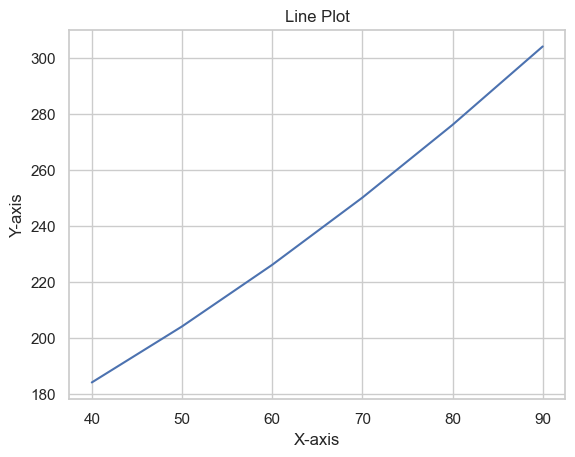

In [134]:
sns.set(style="whitegrid")  # Optional: Set the plot style
sns.lineplot(x=df1['X'], y=df1['Y'])

# Add labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot")

# Show the plot
plt.show()

In [135]:
def calculation_p_series_backward(p,upto):
    #for cacluale p , p(p+1)(p+2) , p(p+1)(p+2)(p+3)
    i=1
    value=p
    while(i<upto):
        value=value*(p+i)
        i=i+1
    return value/math.factorial(upto)

def newton_backward(df2,p,size):
    # formulae:
    #yp=yn+p(Del_y)+p(p+1)(del^2_y)/2fact + p(p+1)(p+2)(del^3_y)/3fact+.......
    yp=0
    yp=df2['Y'][size-1]
    i=1
    while(i<size):
        yp=yp+(calculation_p_series_backward(p,i)*df2[f'Del^{i}_Y'][size1-1])
        i=i+1
    return yp

In [136]:
#what value of X you want to find Y?
#find_y=?
#calculate p?
p1=((find_x1-xn))/height1
print(f"Height: {height1 }")
print(f"last value of X : {xn}")
print(f"Calculated Value of P : {p1}")
find_y1=newton_backward(df1,p1,size1)
print(find_y1)

Height: 10
last value of X : 90
Calculated Value of P : -0.6
286.96


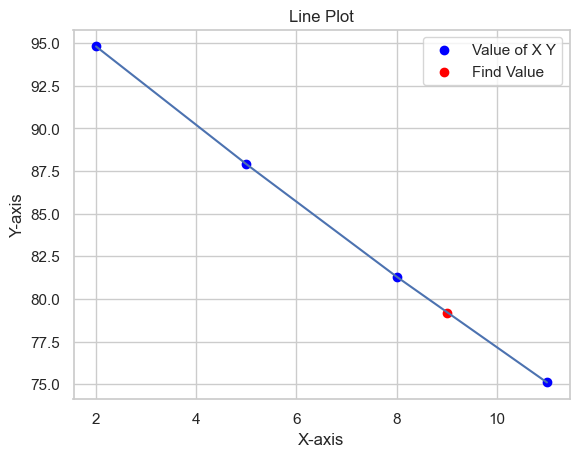

In [131]:
# Show the data point (x1, y1) as a red dot
sns.set(style="whitegrid")  # Optional: Set the plot style
sns.lineplot(x=df1['X'], y=df1['Y'])

# Add labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot")
plt.scatter(df1['X'], df1['Y'], color='blue',label='Value of X Y')
plt.scatter(find_x1, find_y1, color='red', label='Find Value')

# Add a legend
plt.legend()
plt.show()